<a href="https://colab.research.google.com/github/sgarrepalli27/genai_exp/blob/main/suman_llama3_2_vision_instruct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install accelerate
!pip install torch
!pip install -U bitsandbytes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import requests
import torch
from PIL import Image
from IPython.display import display
from transformers import MllamaForConditionalGeneration, AutoProcessor
from transformers import pipeline

In [ ]:
model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    load_in_4bit=True,
)
processor = AutoProcessor.from_pretrained(model_id)

In [14]:
def extractInfoFromImage(url, prompt, online=False):
  # display the image
  if online:
    image = Image.open(requests.get(url, stream=True).raw)
  else:
    image = Image.open(url)
  image.thumbnail((800, 800))
  display(image)

  # process the each prompt
  messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": prompt}
    ]}
  ]
  input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
  inputs = processor(image, input_text, return_tensors="pt").to(model.device)
  output = model.generate(**inputs, max_new_tokens=1000)
  print(processor.decode(output[0]))

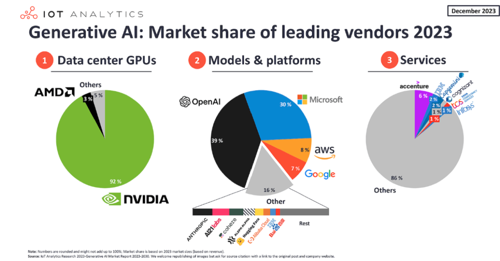

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>In 2024, What is market share of Microsoft? In 2023, What is NVIDIA's market share in GPUs?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Market Share Analysis for 2024 and 2023**

Based on the provided image, which presents a market share breakdown of leading vendors in 2023, we can infer insights about the market share of Microsoft and NVIDIA in 2024 and their respective positions in 2023.

**Microsoft's Market Share in 2024:**
The image does not provide a direct market share for Microsoft in 2024. However, it does show a distribution of market shares for various companies in 2023. Microsoft is listed among the leading vendors, with a significant portion of the market share. Given its position as one of the major players, it's reasonable to infer that Microsoft maintains a substantial market share in 2024, likely building upon its 2023 performance.

**NVIDIA's Market Share in GPUs (2023):

In [9]:
# Extract Info from Infographic Image
extractInfoFromImage("market_share_ai_vendors.png", "In 2024, What is market share of Microsoft? In 2023, What is NVIDIA's market share in GPUs?")

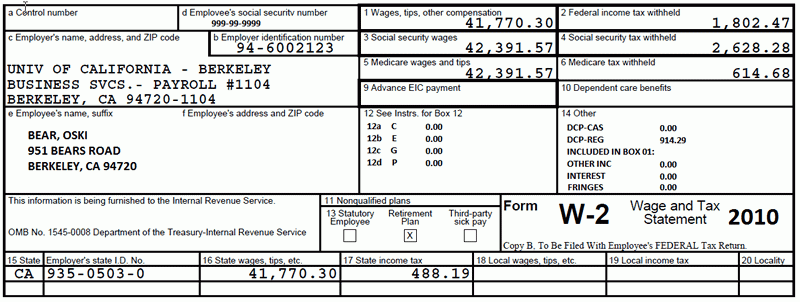

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>What are employee's address, employer's address? is this a Retriement Plan? What is the difference between values of box 3 and box 1?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Address Information**

* Employee's address: 951 Bears Road, Berkeley, CA 94720
* Employer's address: University of California - Berkeley, Business SVCs - Payroll #1104, Berkeley, CA 94720

**Retirement Plan**

* This is not a Retirement Plan, as indicated by the "X" in the "Retirement Plan" box.

**Box 3 vs. Box 1 Values**

* Box 3: Social security wages: $42,391.57
* Box 1: Wages, tips, other compensation: $41,770.30
* Difference: $621.27 ($42,391.57 - $41,770.30)<|eot_id|>


In [16]:
#extract from tabular image document
url = "https://controller.berkeley.edu/sites/default/files/styles/panopoly_image_original/public/w2.gif"
extractInfoFromImage(url, "What are employee's address, employer's address? is this a Retriement Plan? What is the difference between values of box 3 and box 1?", online=True)

#extract info from a rich image
#url = "https://img.freepik.com/free-photo/digital-art-beautiful-mountains_23-2151123686.jpg"
#extractInfoFromImage(url, "Explain the image", online=True)

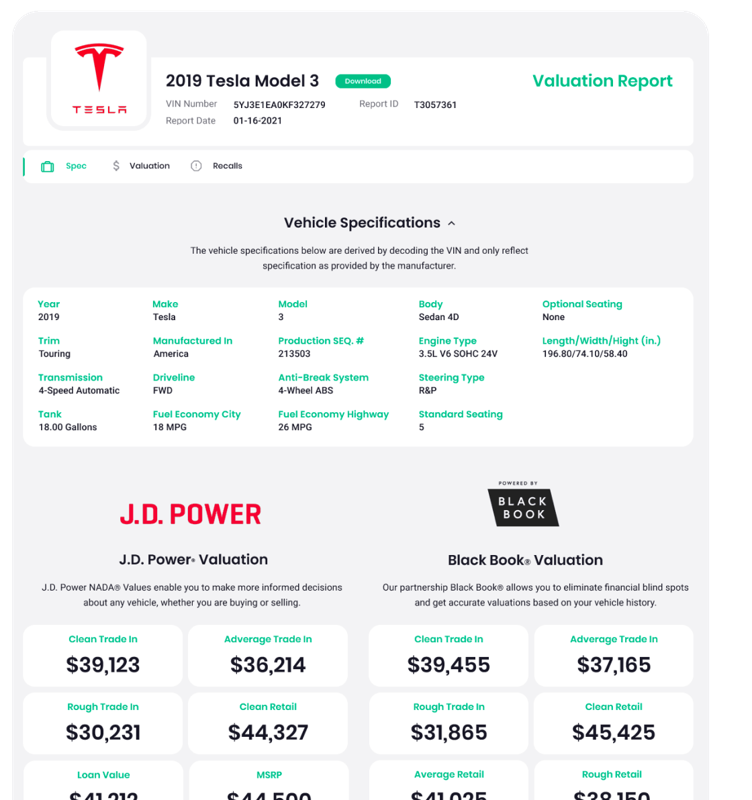

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>What is the document type, if this has vehicle info then extract VIN and car build location.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

**Document Type:** Vehicle Valuation Report

**Vehicle Information:**

* **VIN:** 5YJ3E1EA0KF327279
* **Make:** Tesla
* **Model:** Model 3
* **Year:** 2019

**Car Build Location:** This information is not explicitly provided in the document. However, based on the VIN, it can be inferred that the car was built in the United States, as the first character in the VIN is '5', which indicates the country of origin. The '5' in the VIN stands for the United States.<|eot_id|>


In [26]:
#extract from tabular image document
url = "valuation-report-new.png"
extractInfoFromImage(url, "What is the document type, if this has vehicle info then extract VIN and car build location.")

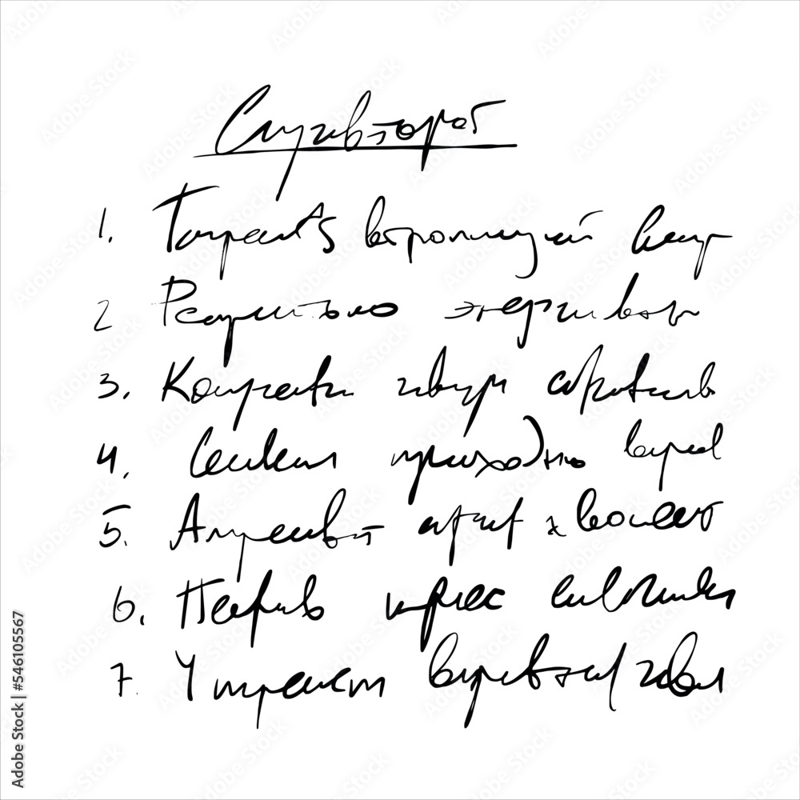

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Print the text from the image. What language is this? WHat does it mean?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The text in the image is written in Russian, and it appears to be a list of seven items, possibly a to-do list or a shopping list. The text is handwritten in black ink on a white background, with each item numbered from 1 to 7.

Here is the list translated into English:

1. **Torpents bponmy eir lyp**: This likely refers to something related to food or a specific type of food item, possibly a type of fish or a type of meat.
2. **Peyeesbo eepu bor**: This could be a type of food or ingredient, possibly a vegetable or a type of spice.
3. **Koupeeta ubyp apeturb**: This might be a type of food or a specific type of dish, possibly a type of dessert or a type of sauce.
4. **Leulen ypusodin lyped**: This could be a type of food or a specific type of ingredient, possibly a type of f

In [29]:
#extract from hand written notes
url = "https://as2.ftcdn.net/v2/jpg/05/46/10/55/1000_F_546105567_iVVuZgXc0cF2YGbUA6hzDgnF82KhGguf.jpg"
extractInfoFromImage(url, "Print the text from the image. What language is this? WHat does it mean?", online=True)

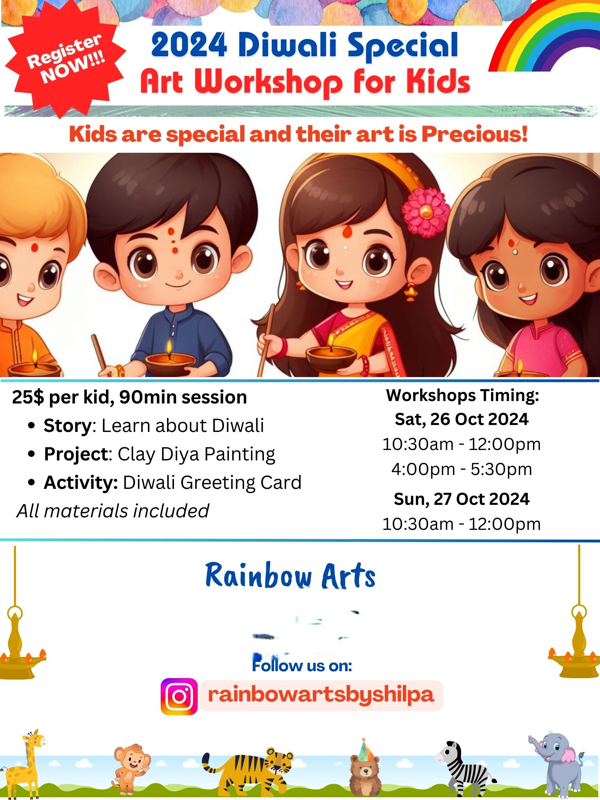

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>How many kids i can enroll if my budget is 1245 dollars?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

To determine the number of kids that can be enrolled with a budget of $1245, we need to divide the total cost by the cost per kid.

**Step 1: Determine the cost per kid**
The cost per kid is $25.

**Step 2: Calculate the number of kids that can be enrolled**
Number of kids = Total cost / Cost per kid
= 1245 / 25
= 49.8

Since you cannot enroll a fraction of a child, we round down to the nearest whole number.

**Answer:** 49<|eot_id|>


In [30]:
#extract from hand written notes
url = "RainbowArtsPosters.jpg"
extractInfoFromImage(url, "How many kids i can enroll if my budget is 1245 dollars?")

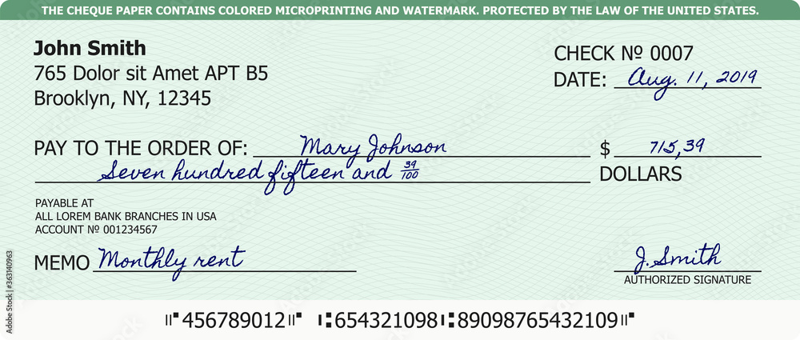

<|begin_of_text|><|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Classify the document type and extract payor address, bank name, routing, MICR and validate if they are fake<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The document type is a check, which is a financial instrument used for transactions. The payor address is 765 Dolor sit Amet APT B5, Brooklyn, NY, 12345. The bank name is not explicitly mentioned, but the check is payable at all lorem bank branches in the USA. The routing number is 001234567, and the MICR code is not provided. However, the check is fake as it contains a placeholder text "Lorem ipsum" and does not have a real account number.<|eot_id|>


In [41]:
#detect fraud
url = "fake_check.jpg"
extractInfoFromImage(url, "Classify the document type and extract payor address, bank name, routing, MICR and validate if they are fake")